### Exercise project_4 Random forest ML model. I will use a new dataset "Student Alcohol Consumption" (https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download). There are two datasets, i will use student-por.csv (Portuguese language course) one because it has more than 500 rows and 30 columns.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Cleaning and optimizing the dataset:

In [94]:
 # load data 
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [95]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [96]:
# check for dublicates:
df.duplicated().sum()

0

In [97]:
# check for missing values 
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### I will create target variable "High_alcohol_use" based on Dalc and Walc variables (workday/weekend alcohol consumption 1-5). This dataset uses the following scale: 1 – very low, 2 – low, 3 – average, 4 – high, 5 – very high. If a student's average score is above 3, it indicates high alcohol consumption. 

In [98]:
df["Dalc"].value_counts()


Dalc
1    451
2    121
3     43
5     17
4     17
Name: count, dtype: int64

In [99]:
df["Walc"].value_counts()

Walc
1    247
2    150
3    120
4     87
5     45
Name: count, dtype: int64

In [100]:
# creating a new variable based on  Dalc and Walc variables:
df['high_alcohol_use'] = ((df['Walc'] + df['Dalc']) / 2 > 3).map({True: 1, False: 0})

In [101]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,high_alcohol_use
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0


In [102]:
# check the distribution of the target variable
# not balanced variable, the same problem as in the previous dataset
df["high_alcohol_use"].value_counts()


high_alcohol_use
0    579
1     70
Name: count, dtype: int64

In [103]:
# checking support variables:
df["sex"].value_counts()

sex
F    383
M    266
Name: count, dtype: int64

In [104]:
# R - means rural, U - means urban, we can use rural addresses as it may effect the alcohol use
df["address"].value_counts()

address
U    452
R    197
Name: count, dtype: int64

In [105]:
#'LE3' - less or equal to 3 or 'GT3' - greater than 3
df["famsize"].value_counts()

famsize
GT3    457
LE3    192
Name: count, dtype: int64

In [106]:
# 'T' - living together or 'A' - apart
df["Pstatus"].value_counts()

Pstatus
T    569
A     80
Name: count, dtype: int64

In [107]:
df["guardian"].value_counts()

guardian
mother    455
father    153
other      41
Name: count, dtype: int64

In [108]:
# use of OneHotEncoder for "guardian" column , it will create multiple columns with numeric values:
from sklearn.preprocessing import OneHotEncoder
variables = ["guardian"]
             
# use encoder:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [109]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,high_alcohol_use,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,4,0,11,11,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,2,9,11,11,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,6,12,13,12,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,0,14,14,14,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,0,11,13,13,0,1,0,0


In [110]:
# next we will remove one new boolean variable "guardian_other" (since it's going to be represented
# by a straight line of zeroes)
df = df.drop("guardian_other", axis=1)

In [111]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'high_alcohol_use',
       'guardian_father', 'guardian_mother'],
      dtype='object')

In [112]:
#  extra educational support, the same binary yes/not for "famsup"- family educational support ,
# "paid" - extra paid classes within the course subject, "activities" - extra-curricular activities,
# "nursery"- attended nursery school,'higher', 'internet', 'romantic'
df["schoolsup"].value_counts()

schoolsup
no     581
yes     68
Name: count, dtype: int64

In [113]:
# now we will use LabelEncoder to converts the value of column to 0 or 1 for such columns that have just 2 unique values

from sklearn.preprocessing import LabelEncoder
# list of all boolean variables we want to convert
variables = ['sex', "address","famsize","Pstatus","schoolsup","famsup","paid","activities",
             "nursery","higher","internet","romantic"]

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [114]:
# "famrel" - quality of family relationships (numeric: from 1 - very bad to 5 - excellent),
# the same values for "freetime" - free time after school, "goout" - going out with friends,
# "health" - current health status.
df["famrel"].value_counts()

famrel
4    317
5    180
3    101
2     29
1     22
Name: count, dtype: int64

In [115]:
# drop not needed columns ("Mjob","Fjob" - job of mother and father, 
# these variable may effect the alcohol use, but we have to many columns; "reason" - reason for choosing the school, )
columns_to_drop = ["Dalc",
                   "Walc",
                   "G1",
                   "G2",
                   "G3",
                   "school",
                   "Mjob",
                   "Fjob",
                   "reason"

]
df = df.drop(columns_to_drop, axis=1)

In [116]:
len(df.columns)

26

In [117]:
df.head(5)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,internet,romantic,famrel,freetime,goout,health,absences,high_alcohol_use,guardian_father,guardian_mother
0,0,18,1,0,0,4,4,2,2,0,...,0,0,4,3,4,3,4,0,0,1
1,0,17,1,0,1,1,1,1,2,0,...,1,0,5,3,3,3,2,0,1,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,4,3,2,3,6,0,0,1
3,0,15,1,0,1,4,2,1,3,0,...,1,1,3,2,2,5,0,0,0,1
4,0,16,1,0,1,3,3,1,2,0,...,0,0,4,3,2,5,0,0,1,0


####  Now, all columns contain only numeric values. In total, there are 26 columns. Next, I will check the data distribution and correlation.

### Visualising the Data.

<Axes: >

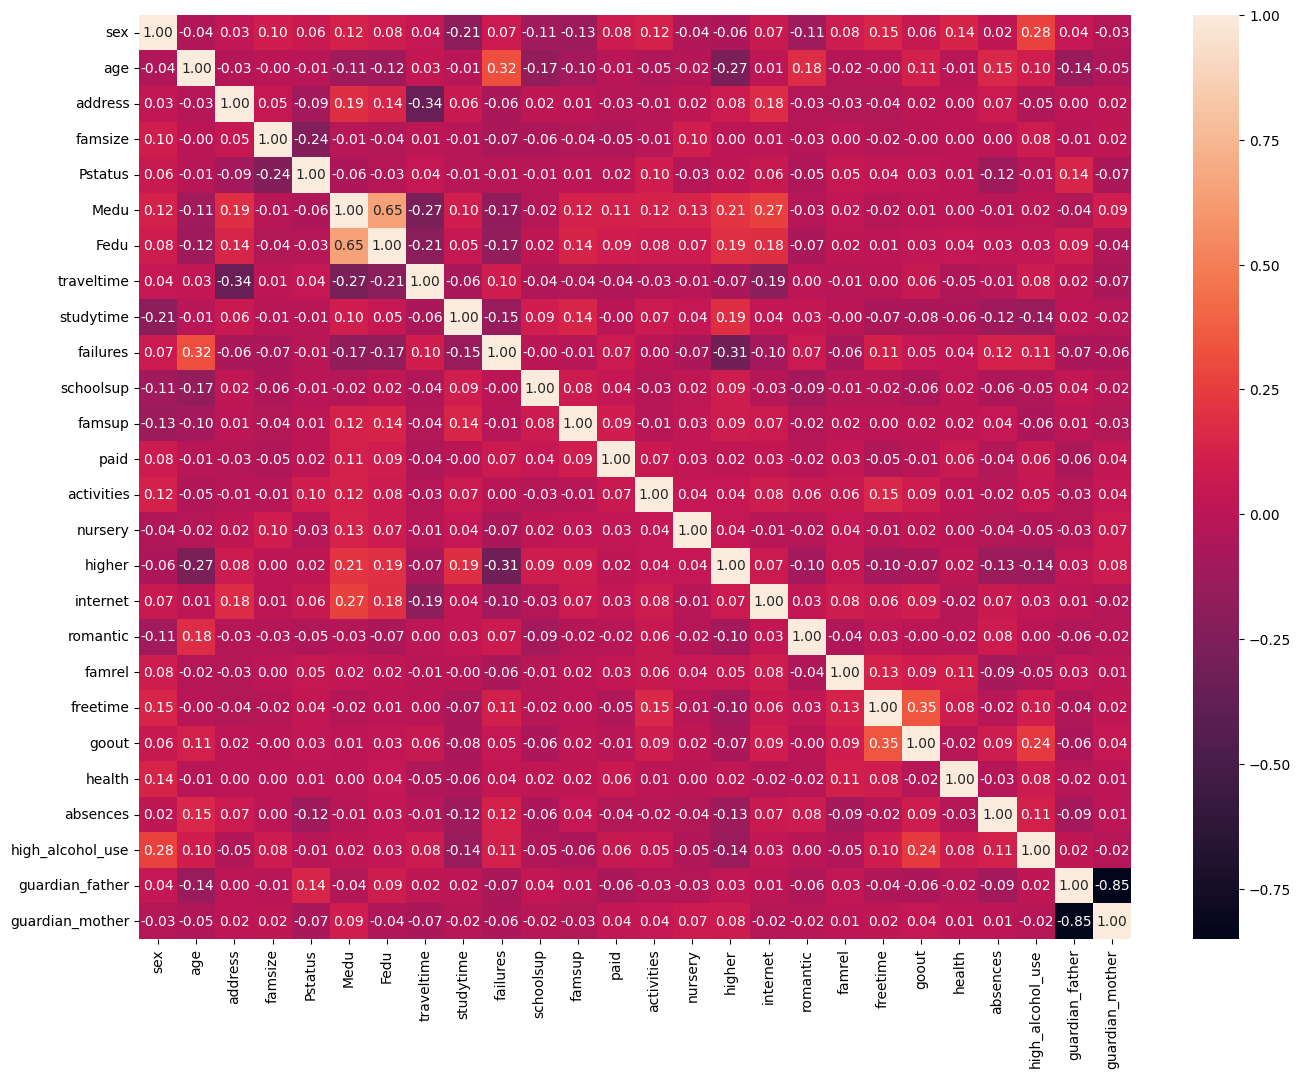

In [118]:
# it was difficult to see numbers, so we will increase the figure size:
plt.figure(figsize=(16, 12))

# on this correlation matrix we can see the most important supported variables:
# median_income. Also, "ocean_proximity_<1H OCEAN" variale correlate with out target variable and
# "ocean_proximity_INLAND" has negative correlation. 
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

#### From correlation matrix we can see that "sex","failures","goout" and "absences" variables have the highest correlation with "high_alcohol_use"

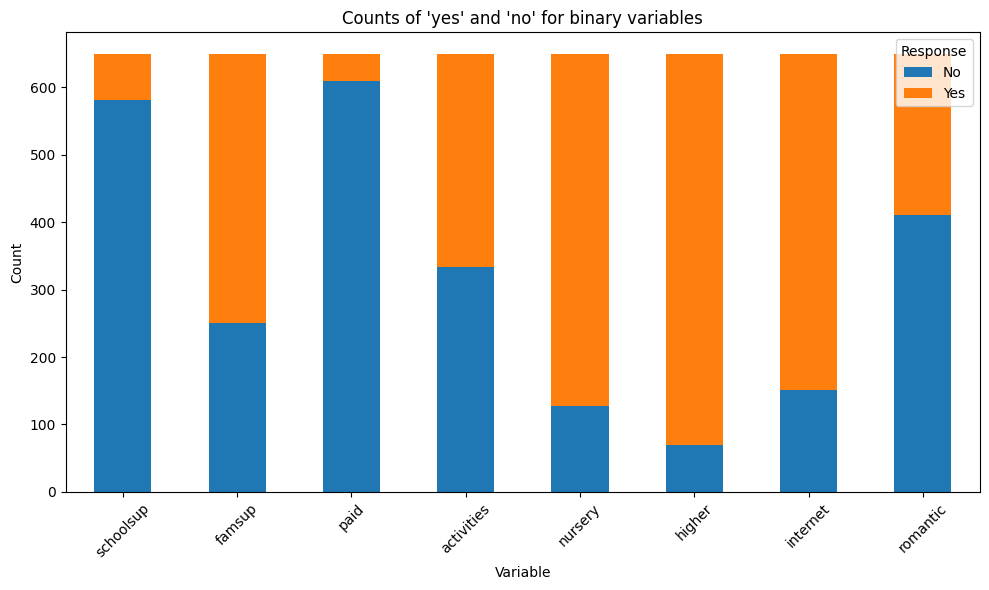

In [121]:
# List of binary columns
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Create a DataFrame of value counts
binary_counts = pd.DataFrame({col: df[col].value_counts() for col in binary_cols}).T

# Rename columns to handle missing values if any variable has only one category
binary_counts = binary_counts.rename(columns={True: 'Yes', False: 'No'}).fillna(0)

# Plot
binary_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Counts of 'yes' and 'no' for binary variables")
plt.ylabel("Count")
plt.xlabel("Variable")
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.tight_layout()
plt.show()